In [1]:
from face_detector import YoloDetector
import numpy as np
from PIL import Image

print("Loading Model")
model = YoloDetector(target_size=720,min_face=90, device='cpu')


/opt/homebrew/Caskroom/miniforge/base/envs/research/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading Model
cpu
/Users/roberto/Desktop/WORKSPACE/THESIS/other_repo/YOLO/yoloface/weights/yolov5s.pt


AttributeError: Can't get attribute 'SPPF' on <module 'models.common' from '/Users/roberto/Desktop/WORKSPACE/THESIS/other_repo/YOLO/yoloface/models/common.py'>

In [2]:
import cv2
# img_path = "./test_img/single_face.png"
# img_path = "./test_img/MRF2_sample_masked.png"
img_path = "./test_img/COMAKS_sampel_masked.JPG"

print("Loading Image")
# img = Image.open(img_path)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
orgimg = np.array(img)
print("Predicting")
bboxes,points = model.predict(orgimg)
print(bboxes, points)

Loading Image
Predicting
OUT SHAPE:
torch.Size([1, 45360, 16])
tensor([[[  2.91555,   4.34278,  10.42077,  ...,   4.05915,   7.14845,   0.98264],
         [ 11.54014,   4.00271,  15.39715,  ...,  15.29498,   7.35471,   0.98277],
         [ 21.19011,   3.22350,  14.14112,  ...,  23.91354,   5.72917,   0.98273],
         ...,
         [689.42560, 920.69385, 110.20625,  ..., 709.51996, 966.39178,   0.98256],
         [710.11102, 924.31750, 102.84229,  ..., 722.14471, 966.30835,   0.98256],
         [744.53363, 928.39343, 107.26006,  ..., 751.90521, 969.40784,   0.98257]]])
NON MAX SUPPRESSION
[tensor([[208.25423, 220.99361, 552.01758, 664.48254,   0.73714, 308.01233, 408.05746, 464.36914, 400.76285, 392.78912, 480.28696, 336.11133, 555.86658, 453.01144, 551.48517,   0.00000]])]
[[[494, 592, 1416, 1783]]] [[[[762, 1094], [1181, 1075], [989, 1288], [837, 1491], [1151, 1479]]]]


nose [989, 1288]


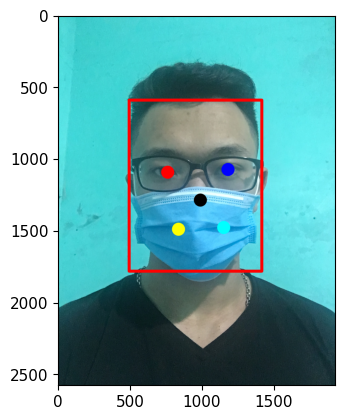

In [22]:
box = bboxes[0][0]
import copy
image = copy.deepcopy(img)

# Drawing Bounding Box
(x_start, y_start, x_end, y_end) = box
image = cv2.rectangle(image, (x_start, y_start), (x_end, y_end), (255,0,0), 20)

# Drawing Point
landmarks = points[0][0]
(left_eye, right_eye, nose, left_mouth, right_mouth) = landmarks
print("nose", nose)
image = cv2.circle(image, left_eye, 20, (255,0,0), 50)
image = cv2.circle(image, right_eye, 20, (0,0,255), 50)
image = cv2.circle(image, nose, 20, (0,0,0), 50)
image = cv2.circle(image, left_mouth, 20, (255,255,0), 50)
image = cv2.circle(image, right_mouth, 20, (0,255,255), 50)

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(image)
plt.show()

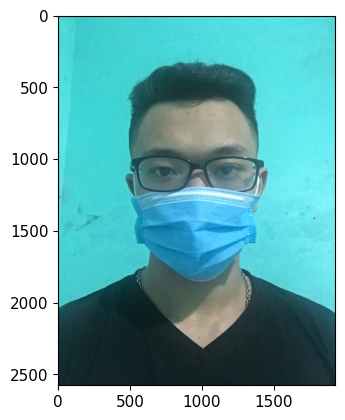

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img)
plt.show()
# plt.savefig("output.png")


# ONNX detector


In [ ]:
from face_detector_onnx import YoloDetectorONNX
model = YoloDetectorONNX(target_size=720,min_face=90, device='cpu')